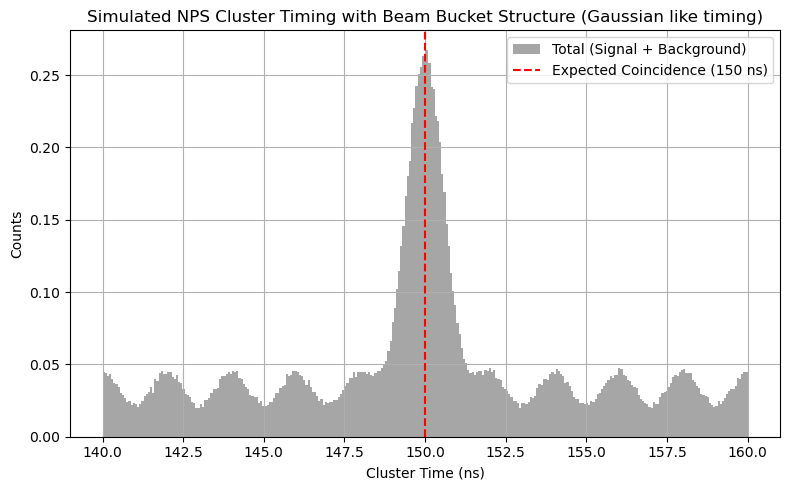

In [26]:
# Gaussian

import numpy as np
import matplotlib.pyplot as plt

# === Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # Simulate +/- 200 buckets (~400 ns window)
true_peak_time = 150.0           # ns, main coincidence
timing_resolution = 0.6          # ns (Gaussian sigma)
n_true_events = 80000             # Number of true coincidences
n_bg_per_bucket = 16000             # Background events per beam bucket

# === Simulate true coincidences ===
true_times = np.random.normal(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Simulate background ===
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = np.random.normal(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# === Combine signal and background ===
all_cluster_times = np.concatenate([true_times, bg_times])

# === Plot histogram ===
plt.figure(figsize=(8, 5))
bins = np.linspace(140, 160, 300)
plt.hist(all_cluster_times, bins=bins, density=True, color='gray', alpha=0.7, label='Total (Signal + Background)')
plt.axvline(true_peak_time, color='red', linestyle='--', label='Expected Coincidence (150 ns)')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Simulated NPS Cluster Timing with Beam Bucket Structure (Gaussian like timing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


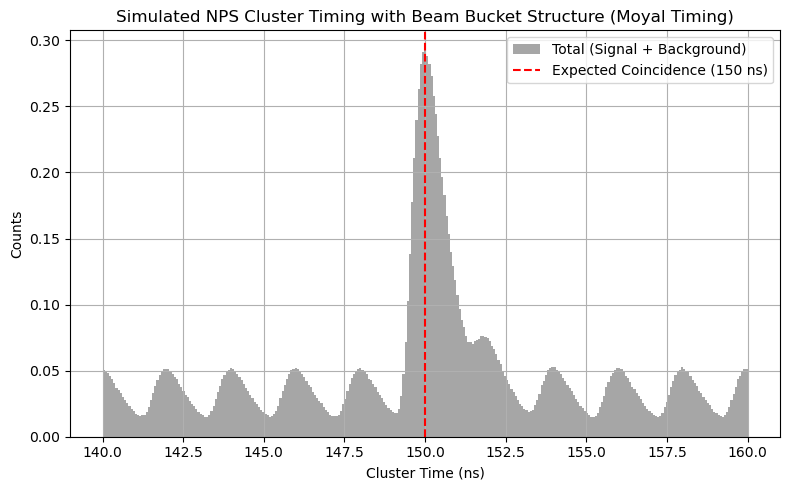

In [17]:
# Landau

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal

# === Parameters ===
# beam_bucket_spacing = 2.0        # ns
# n_buckets = 200                  # Simulate +/- 200 buckets (~400 ns window)
# true_peak_time = 150.0           # ns, main coincidence
# timing_resolution = 0.4          # ns (Gaussian sigma)
# n_true_events = 100000             # Number of true coincidences
# n_bg_per_bucket = 16000             # Background events per beam bucket

# === Fixed Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # +/- 400 ns window
main_peak_time = 150.0           # ns
timing_resolution = 0.34         # ns
n_true_events = int(1000000 * 0.868)  # scale factor from data
n_bg_per_bucket = int(16000 * 10.568)        # from scale factor

# === Simulate true coincidences (Moyal ≈ Landau) ===
true_times = moyal.rvs(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Simulate background ===
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = moyal.rvs(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# === Combine signal and background ===
all_cluster_times = np.concatenate([true_times, bg_times])

# === Plot histogram ===
plt.figure(figsize=(8,5))
bins = np.linspace(140, 160, 300)
plt.hist(all_cluster_times, bins=bins, density=True, color='gray', alpha=0.7, label='Total (Signal + Background)')
plt.axvline(true_peak_time, color='red', linestyle='--', label='Expected Coincidence (150 ns)')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Simulated NPS Cluster Timing with Beam Bucket Structure (Moyal Timing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


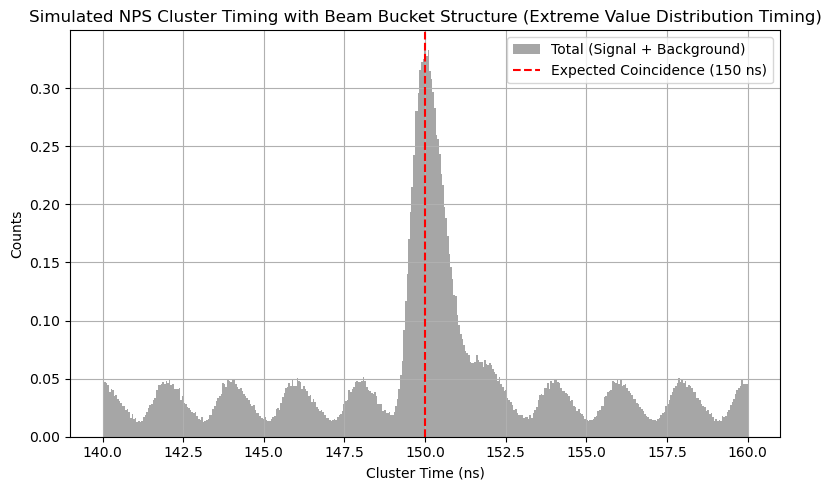

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# === Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # Simulate +/- 200 buckets (~400 ns window)
true_peak_time = 150.0           # ns, main coincidence
n_true_events = 100000            # Number of true coincidences
n_bg_per_bucket = 16000          # Background events per beam bucket

# === Gumbel Distribution Parameters ===
loc = 0.0                        # mean offset for timing jitter (will shift to t_peak)
scale = 0.5                      # controls timing spread and tail length

def gumbel_samples(t_center, size):
    """
    Generate cluster times from a Gumbel (Extreme Value) distribution centered at t_center.
    """
    return t_center + gumbel_r.rvs(loc=loc, scale=scale, size=size)

# === Simulate true coincidences ===
true_times = gumbel_samples(true_peak_time, size=n_true_events)

# === Simulate beam bucket background ===
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = gumbel_samples(t_bucket, size=n_bg_per_bucket)
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# === Combine signal and background ===
all_cluster_times = np.concatenate([true_times, bg_times])

# === Plot histogram ===
plt.figure(figsize=(8, 5))
bins = np.linspace(140, 160, 400)
plt.hist(all_cluster_times, bins=bins, density=True, color='gray', alpha=0.7, label='Total (Signal + Background)')
plt.axvline(true_peak_time, color='red', linestyle='--', label='Expected Coincidence (150 ns)')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Simulated NPS Cluster Timing with Beam Bucket Structure (Extreme Value Distribution Timing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


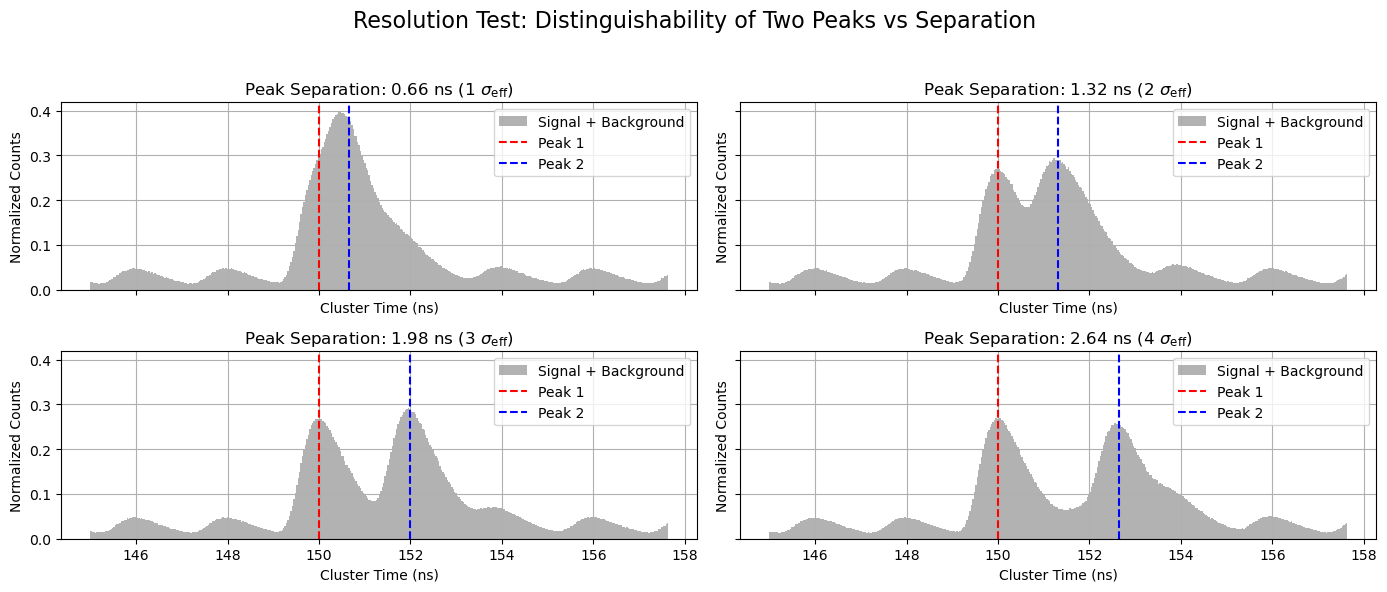

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal

# === Fixed Parameters ===
# beam_bucket_spacing = 2.0        # ns
# n_buckets = 200                  # +/- 200 buckets (~400 ns)
# main_peak_time = 150.0           # ns, main coincidence
# timing_resolution = 0.4          # ns (Moyal scale ~ Gaussian sigma)
# n_events_per_peak = 100000        # For each signal peak
# n_bg_per_bucket = 16000          # Background events per beam bucket

beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # +/- 400 ns window
main_peak_time = 150.0           # ns
timing_resolution = 0.34          # ns
n_events_per_peak = int(1000000 * 0.868)  # scale factors found by scaling to data; see exclusive_pi0.ipynb
n_bg_per_bucket = int(16000 * 10.568)

# === Peak Separation to Test ===
peak_separations = [0.66, 1.32, 1.98, 2.64]  # ns between the two peaks

# === Loop Over Separations ===
fig, axs = plt.subplots(2, 2, figsize=(14, 6), sharex=True, sharey=True)
axs = axs.flatten()

for i, dt in enumerate(peak_separations):
    second_peak_time = main_peak_time + dt

    # === Simulate signal peaks ===
    peak1 = moyal.rvs(loc=main_peak_time, scale=timing_resolution, size=n_events_per_peak)
    peak2 = moyal.rvs(loc=second_peak_time, scale=timing_resolution, size=n_events_per_peak)

    # === Simulate background ===
    bg_times = []
    for j in range(-n_buckets, n_buckets + 1):
        t_bucket = main_peak_time + j * beam_bucket_spacing
        bg = moyal.rvs(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
        bg_times.extend(bg)

    # === Combine all ===
    all_times = np.concatenate([peak1, peak2, bg_times])

    # === Plot ===
    axs[i].hist(all_times, bins=np.linspace(145, 155 + max(peak_separations), 400), density=True,
                color='gray', alpha=0.6, label='Signal + Background')
    axs[i].axvline(main_peak_time, color='red', linestyle='--', label='Peak 1')
    axs[i].axvline(second_peak_time, color='blue', linestyle='--', label='Peak 2')
    axs[i].set_title(f"Peak Separation: {dt:.2f} ns ({i+1} $\\sigma_\\mathrm{{eff}}$)")
    axs[i].set_xlabel("Cluster Time (ns)")
    axs[i].set_ylabel("Normalized Counts")
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle("Resolution Test: Distinguishability of Two Peaks vs Separation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


FWHM ≈ 1.203 ns


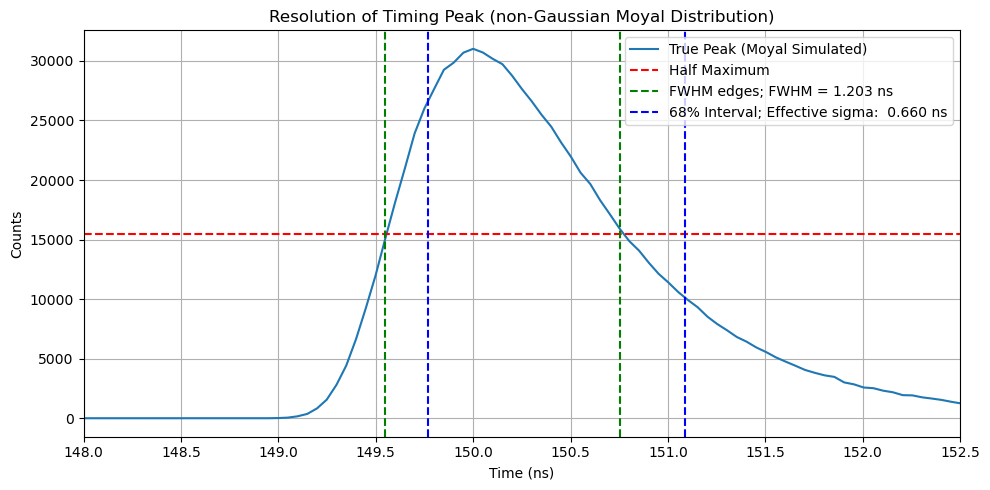

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal
from scipy.signal import find_peaks

# === Generate the Moyal Distribution (as before) ===
timing_resolution = 0.34
true_peak_time = 150.0
n_true_events = int(1000000 * 0.868)  # scale factor from data
true_times = moyal.rvs(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Histogram ===
bins = np.linspace(140, 160, 400)
hist, bin_edges = np.histogram(true_times, bins=bins, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# === Find the Peak ===
peak_index = np.argmax(hist)
peak_height = hist[peak_index]
half_max = peak_height / 2

# === Find FWHM ===
# Find where the curve crosses the half-max value
above_half_max = hist >= half_max
crossing_indices = np.where(np.diff(above_half_max.astype(int)) != 0)[0]

# === Find effective sigma (width of the central 68% interval) ===
sorted_data = np.sort(true_times)
low_idx = int(0.16 * len(sorted_data))
high_idx = int(0.84 * len(sorted_data))
width_68 = sorted_data[high_idx] - sorted_data[low_idx]
effective_sigma = width_68 / 2

if len(crossing_indices) >= 2:
    left_idx, right_idx = crossing_indices[0], crossing_indices[-1]
    fwhm = bin_centers[right_idx] - bin_centers[left_idx]
    print(f"FWHM ≈ {fwhm:.3f} ns")

    # === Plot with FWHM marked ===
    plt.figure(figsize=(10,5))
    plt.plot(bin_centers, hist, label="True Peak (Moyal Simulated)")
    plt.axhline(half_max, color="red", linestyle="--", label="Half Maximum")
    plt.axvline(bin_centers[left_idx], color="green", linestyle="--", label=f"FWHM edges; FWHM = {fwhm:.3f} ns")
    plt.axvline(bin_centers[right_idx], color="green", linestyle="--")
    plt.axvline(sorted_data[low_idx], color="blue", linestyle="--", label=f"68% Interval; Effective sigma: {effective_sigma: .3f} ns")
    plt.axvline(sorted_data[high_idx], color="blue", linestyle="--")
    plt.xlabel("Time (ns)")
    plt.ylabel("Counts")
    plt.xlim(148, 152.5)
    plt.title("Resolution of Timing Peak (non-Gaussian Moyal Distribution)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("FWHM could not be reliably determined.")


FWHM ≈ 1.203 ns
Effective Sigma ≈ 0.660 ns


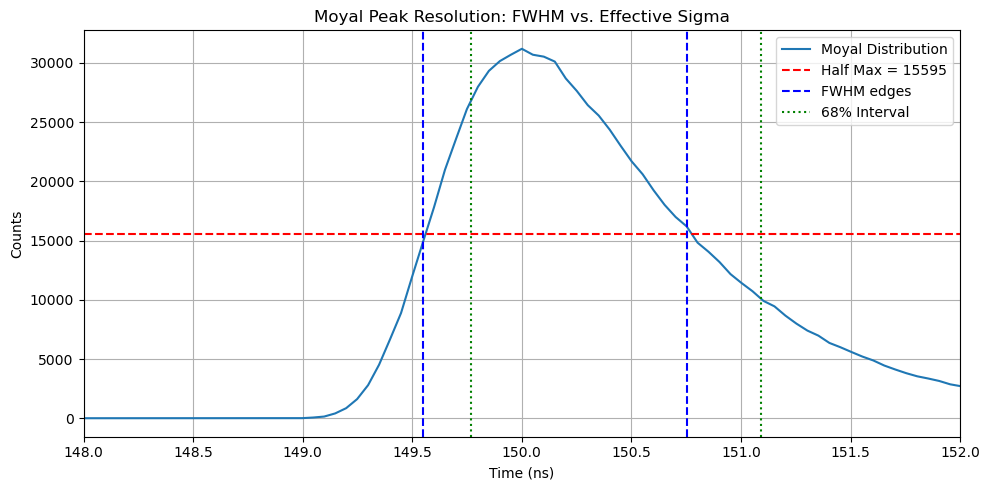

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal

# === Generate Moyal Distribution ===
timing_resolution = 0.34
true_peak_time = 150.0
n_true_events = int(1000000 * 0.868)
true_times = moyal.rvs(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Histogram ===
bins = np.linspace(140, 160, 400)
hist, bin_edges = np.histogram(true_times, bins=bins, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# === Peak and FWHM ===
peak_index = np.argmax(hist)
peak_height = hist[peak_index]
half_max = peak_height / 2

# Find indices where it crosses half max
above_half_max = hist >= half_max
crossing_indices = np.where(np.diff(above_half_max.astype(int)) != 0)[0]

# === Effective Sigma (central 68% interval) ===
sorted_data = np.sort(true_times)
low_idx = int(0.16 * len(sorted_data))
high_idx = int(0.84 * len(sorted_data))
width_68 = sorted_data[high_idx] - sorted_data[low_idx]
effective_sigma = width_68 / 2

# === Plot ===
if len(crossing_indices) >= 2:
    left_idx, right_idx = crossing_indices[0], crossing_indices[-1]
    fwhm = bin_centers[right_idx] - bin_centers[left_idx]
    print(f"FWHM ≈ {fwhm:.3f} ns")
    print(f"Effective Sigma ≈ {effective_sigma:.3f} ns")

    plt.figure(figsize=(10, 5))
    plt.plot(bin_centers, hist, label="Moyal Distribution")
    
    # FWHM markers
    plt.axhline(half_max, color="red", linestyle="--", label=f"Half Max = {half_max:.0f}")
    plt.axvline(bin_centers[left_idx], color="blue", linestyle="--", label="FWHM edges")
    plt.axvline(bin_centers[right_idx], color="blue", linestyle="--")

    # Effective sigma markers
    plt.axvline(sorted_data[low_idx], color="green", linestyle=":", label=f"68% Interval")
    plt.axvline(sorted_data[high_idx], color="green", linestyle=":")

    plt.xlabel("Time (ns)")
    plt.ylabel("Counts")
    plt.title("Moyal Peak Resolution: FWHM vs. Effective Sigma")
    plt.xlim(148, 152)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("FWHM could not be reliably determined.")


In [37]:
sorted_data = np.sort(true_times)
low_idx = int(0.16 * len(sorted_data))
high_idx = int(0.84 * len(sorted_data))
width_68 = sorted_data[high_idx] - sorted_data[low_idx]
effective_sigma = width_68 / 2
print(effective_sigma)

0.7763522665925251


Numerical FWHM ≈ 1.3779 ns


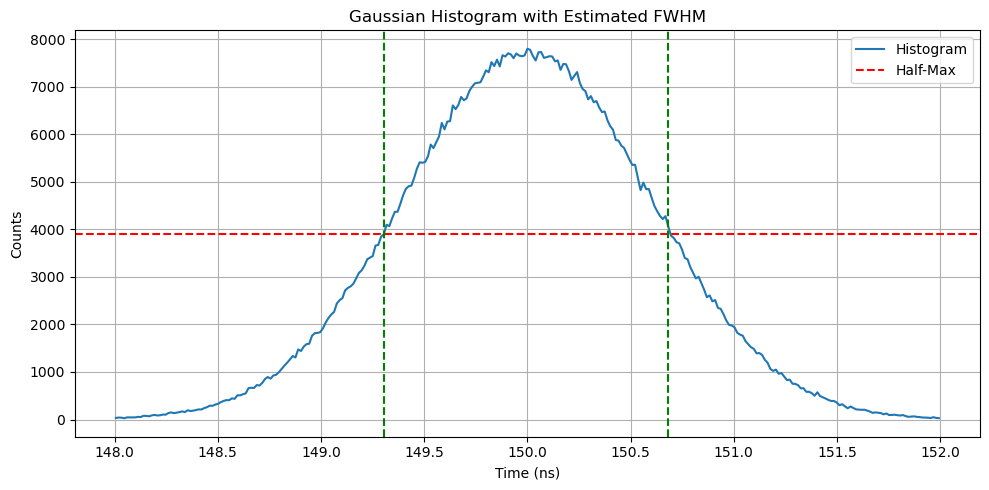

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# === Simulate Gaussian data ===
mu = 150.0        # ns, peak position
sigma = 0.6       # ns, Gaussian std dev
# n_events = 100000
n_true_events = int(1000000 * 0.868)  # scale factor from data
data = np.random.normal(loc=mu, scale=sigma, size=n_true_events)

# === Histogram ===
bins = np.linspace(148, 152, 300)
hist, bin_edges = np.histogram(data, bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# === Estimate FWHM numerically ===
max_val = np.max(hist)
half_max = 0.5 * max_val

above_half_max = hist >= half_max
crossing_indices = np.where(np.diff(above_half_max.astype(int)) != 0)[0]

if len(crossing_indices) >= 2:
    left_idx = crossing_indices[0]
    right_idx = crossing_indices[-1]
    fwhm = bin_centers[right_idx] - bin_centers[left_idx]
    print(f"Numerical FWHM ≈ {fwhm:.4f} ns")
else:
    print("Warning: Could not determine FWHM reliably.")

# === Plot ===
plt.figure(figsize=(10,5))
plt.plot(bin_centers, hist, label='Histogram')
plt.axhline(half_max, color='red', linestyle='--', label='Half-Max')
plt.axvline(bin_centers[left_idx], color='green', linestyle='--')
plt.axvline(bin_centers[right_idx], color='green', linestyle='--')
plt.title("Gaussian Histogram with Estimated FWHM")
plt.xlabel("Time (ns)")
plt.ylabel("Counts")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


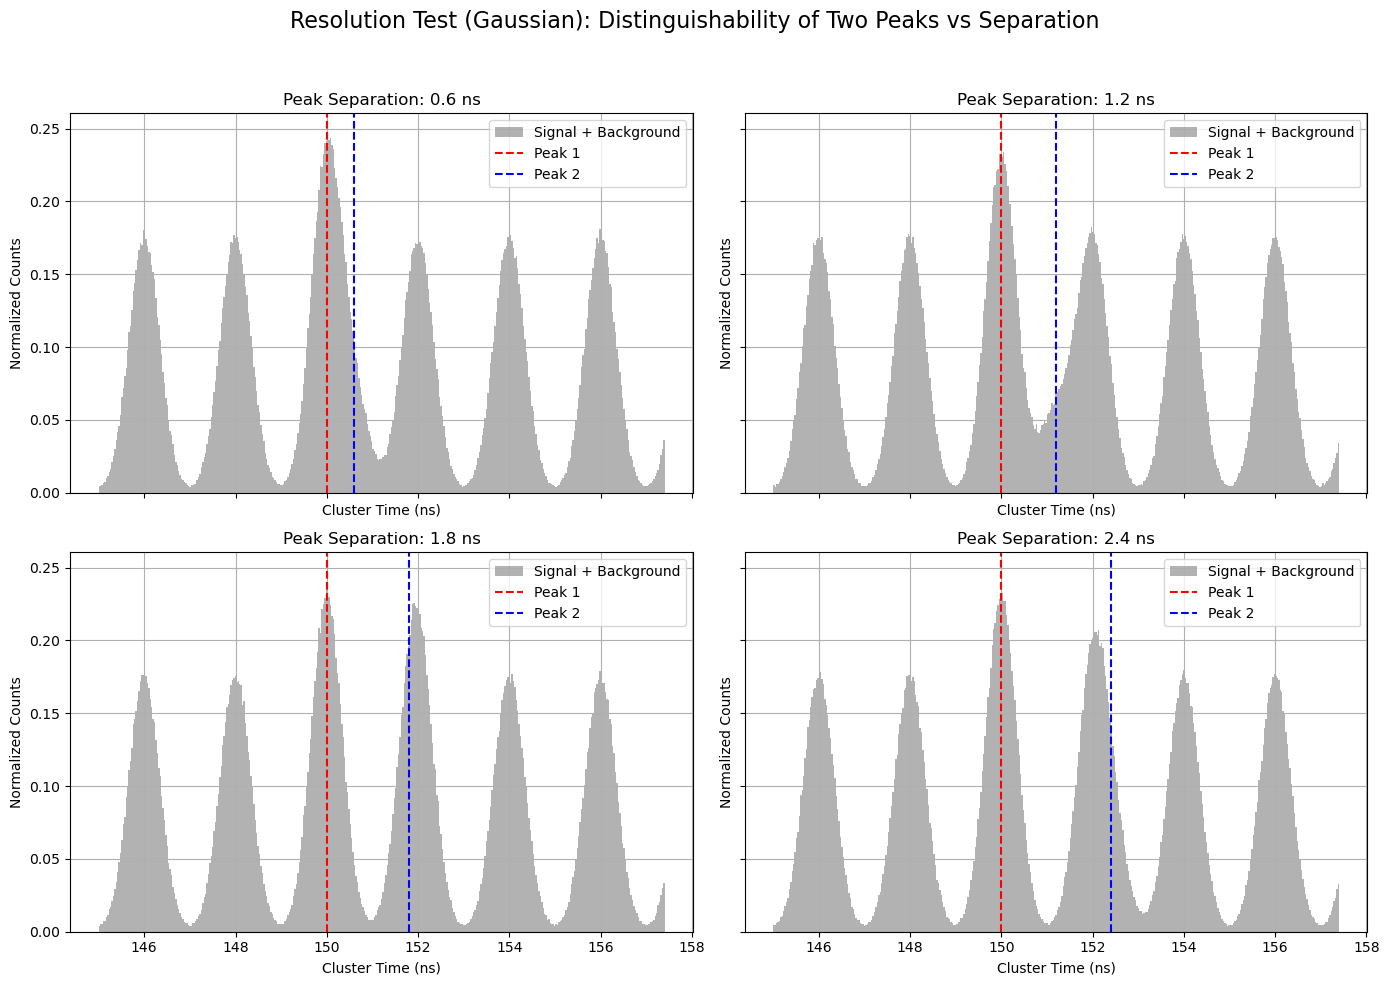

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# === Fixed Parameters ===
# === Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # +/- 400 ns window
true_peak_time = 150.0           # ns
timing_resolution = 0.34          # ns
n_true_events = 1000000 * 0.868  # scale factors found by scaling to data; see exclusive_pi0.ipynb
n_bg_per_bucket = 16000 * 10.568

# === Peak Separation to Test ===
peak_separations = [0.6, 1.2, 1.8, 2.4]  # ns between the two peaks

# === Loop Over Separations ===
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

for i, dt in enumerate(peak_separations):
    second_peak_time = main_peak_time + dt

    # === Simulate signal peaks ===
    peak1 = np.random.normal(loc=main_peak_time, scale=timing_resolution, size=n_events_per_peak)
    peak2 = np.random.normal(loc=second_peak_time, scale=timing_resolution, size=n_events_per_peak)

    # === Simulate background ===
    bg_times = []
    for j in range(-n_buckets, n_buckets + 1):
        t_bucket = main_peak_time + j * beam_bucket_spacing
        bg = np.random.normal(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
        bg_times.extend(bg)

    # === Combine all ===
    all_times = np.concatenate([peak1, peak2, bg_times])

    # === Plot ===
    axs[i].hist(all_times, bins=np.linspace(145, 155 + max(peak_separations), 400), density=True,
                color='gray', alpha=0.6, label='Signal + Background')
    axs[i].axvline(main_peak_time, color='red', linestyle='--', label='Peak 1')
    axs[i].axvline(second_peak_time, color='blue', linestyle='--', label='Peak 2')
    axs[i].set_title(f"Peak Separation: {dt:.1f} ns")
    axs[i].set_xlabel("Cluster Time (ns)")
    axs[i].set_ylabel("Normalized Counts")
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle("Resolution Test (Gaussian): Distinguishability of Two Peaks vs Separation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


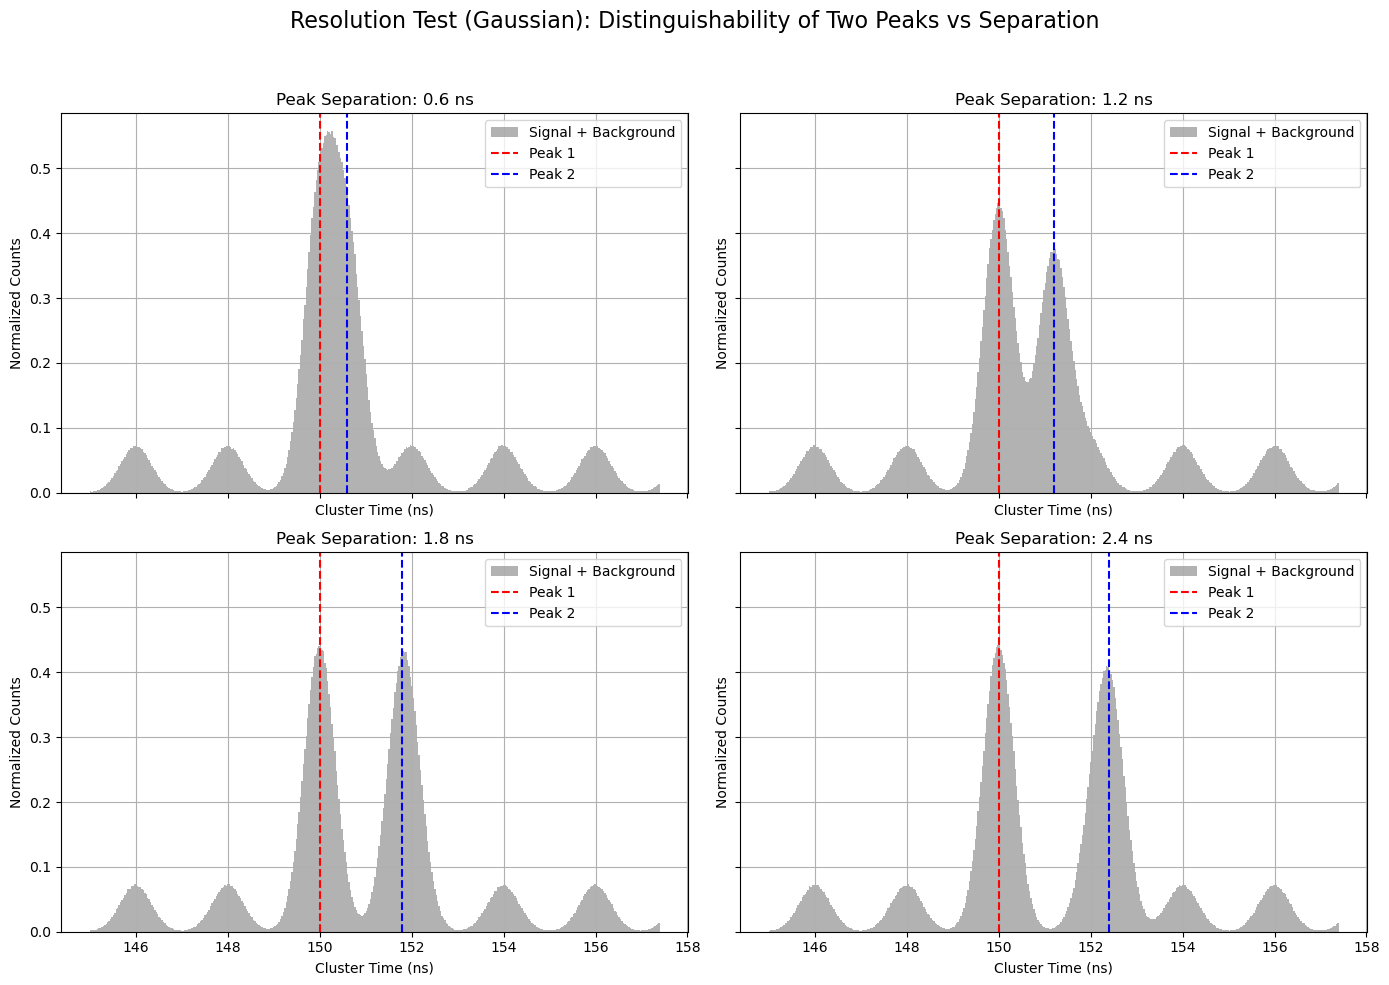

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# === Fixed Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # +/- 400 ns window
main_peak_time = 150.0           # ns
timing_resolution = 0.34         # ns
n_total_true_events = int(1000000 * 0.868)  # scale factor from data
n_events_per_peak = n_total_true_events // 1  # split evenly between two peaks
n_bg_per_bucket = int(16000 * 10.568)        # from scale factor

# === Peak Separations to Test ===
peak_separations = [0.6, 1.2, 1.8, 2.4]  # ns between the two peaks

# === Plot Setup ===
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

for i, dt in enumerate(peak_separations):
    second_peak_time = main_peak_time + dt

    # === Simulate signal peaks ===
    peak1 = np.random.normal(loc=main_peak_time, scale=timing_resolution, size=n_events_per_peak)
    peak2 = np.random.normal(loc=second_peak_time, scale=timing_resolution, size=n_events_per_peak)

    # === Simulate background ===
    bg_times = []
    for j in range(-n_buckets, n_buckets + 1):
        t_bucket = main_peak_time + j * beam_bucket_spacing
        bg = np.random.normal(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
        bg_times.extend(bg)

    # === Combine all ===
    all_times = np.concatenate([peak1, peak2, bg_times])

    # === Plot ===
    axs[i].hist(all_times, bins=np.linspace(145, 155 + max(peak_separations), 400), density=True,
                color='gray', alpha=0.6, label='Signal + Background')
    axs[i].axvline(main_peak_time, color='red', linestyle='--', label='Peak 1')
    axs[i].axvline(second_peak_time, color='blue', linestyle='--', label='Peak 2')
    axs[i].set_title(f"Peak Separation: {dt:.1f} ns")
    axs[i].set_xlabel("Cluster Time (ns)")
    axs[i].set_ylabel("Normalized Counts")
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle("Resolution Test (Gaussian): Distinguishability of Two Peaks vs Separation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
